In [1]:
# %pip install pandas numpy matplotlib seaborn scikit-learn pyarrow Jinja2

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
from IPython.display import display


data_folder = './data_for_test_arch/'

ana_sales_df = pd.read_parquet(os.path.join(data_folder, 'ana_sales_data.parquet'))
ana_upc_df = pd.read_parquet(os.path.join(data_folder, 'ana_upc.parquet'))
beer_sales_df = pd.read_parquet(os.path.join(data_folder, 'beer_sales_data.parquet'))
beer_upc_df = pd.read_parquet(os.path.join(data_folder, 'beer_upc.parquet'))
cig_sales_df = pd.read_parquet(os.path.join(data_folder, 'cig_sales_data.parquet'))
cig_upc_df = pd.read_parquet(os.path.join(data_folder, 'cig_upc.parquet'))
demographics_df = pd.read_parquet(os.path.join(data_folder, 'demographic_data.parquet'))


In [4]:
features_sale = ['store', 'upc', 'week','price', 'sale'] 
ana_features_upc = ['upc', 'size',]
beer_cig_features_upc = ['com_code', 'upc', 'size',]
demo_features = ['store', 'age60', 'age9', 'educ', 'income', 'hhlarge', 'workwom', 'hval150', 'sstrdist', 'sstrvol', 'cpdist5', 'cpwvol5'] 

In [5]:
# Избавляемся от лишних данных
ana_upc_df = ana_upc_df.drop(columns=['com_code', 'case']) 
beer_upc_df = beer_upc_df.drop(columns=['com_code', 'case']) 
cig_upc_df = cig_upc_df.drop(columns=['com_code', 'case']) 


In [6]:

# Добавляем новые колонки
ana_sales_df['product_name'] = 'ana'
beer_sales_df['product_name'] = 'beer'
cig_sales_df['product_name'] = 'cig'



In [7]:
# Объединяем данные
ana_df = pd.merge(ana_sales_df, ana_upc_df, on='upc')
ana_df = ana_df[['descrip', 'upc', 'store', 'nitem', 'qty', 'move', 'price', 'size', 'sale', 'week', 'product_name']]   
ana_df['size'].unique()

# Инициализация новых столбцов
ana_df['quantity'] = 0
ana_df['volume_oz'] = 0
ana_df


,descrip,upc,store,nitem,qty,move,price,size,sale,week,product_name,quantity,volume_oz
0,CAFFEDRINE CAPLETS 1,1192603016,76,7342431,1,0,0.00,16 CT,None,306,ana,0,0
1,CAFFEDRINE CAPLETS 1,1192603016,76,7342431,1,1,2.99,16 CT,None,307,ana,0,0
2,CAFFEDRINE CAPLETS 1,1192603016,76,7342431,1,0,0.00,16 CT,None,308,ana,0,0
3,CAFFEDRINE CAPLETS 1,1192603016,76,7342431,1,0,0.00,16 CT,None,309,ana,0,0
4,CAFFEDRINE CAPLETS 1,1192603016,76,7342431,1,0,0.00,16 CT,None,310,ana,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241650,AZO STANDARD,78765150152,144,8435330,1,0,0.00,30 CT,None,395,ana,0,0
7241651,AZO STANDARD,78765150152,144,8435330,1,0,0.00,30 CT,None,396,ana,0,0
7241652,AZO STANDARD,78765150152,144,8435330,1,0,0.00,30 CT,None,397,ana,0,0
7241653,AZO STANDARD,78765150152,144,8435330,1,0,0.00,30 CT,None,398,ana,0,0


In [8]:
# ana_df['price'][:100]

In [9]:

# plt.scatter(ana_df['week'][], ana_df['price'] )

In [10]:
import re


def parse_size(size):
    if ('OZ' or 'O') in size:
        volume = re.findall(r'\d*\.?\d+', size)
        volume = float(volume[0]) if volume else None
        return 0, volume
    
    else:
        quantity = re.findall(r'\d+', size)  # Извлекаем число
        quantity = int(quantity[0]) if quantity else None
        return quantity, 0
        
ana_df[['quantity', 'volume_oz']] = ana_df['size'][:100].apply(parse_size).apply(pd.Series)

print(ana_df)

                      descrip          upc  store    nitem  qty  move  price  \
0        CAFFEDRINE CAPLETS 1   1192603016     76  7342431    1     0   0.00   
1        CAFFEDRINE CAPLETS 1   1192603016     76  7342431    1     1   2.99   
2        CAFFEDRINE CAPLETS 1   1192603016     76  7342431    1     0   0.00   
3        CAFFEDRINE CAPLETS 1   1192603016     76  7342431    1     0   0.00   
4        CAFFEDRINE CAPLETS 1   1192603016     76  7342431    1     0   0.00   
...                       ...          ...    ...      ...  ...   ...    ...   
7241650          AZO STANDARD  78765150152    144  8435330    1     0   0.00   
7241651          AZO STANDARD  78765150152    144  8435330    1     0   0.00   
7241652          AZO STANDARD  78765150152    144  8435330    1     0   0.00   
7241653          AZO STANDARD  78765150152    144  8435330    1     0   0.00   
7241654          AZO STANDARD  78765150152    144  8435330    1     0   0.00   

          size  sale  week product_name

In [11]:
# 
products = pd.concat([ana_sales_df, beer_sales_df, cig_sales_df], axis=0, ignore_index=True)
products['upc'] == ''

# plt.

0           False
1           False
2           False
3           False
4           False
            ...  
16540739    False
16540740    False
16540741    False
16540742    False
16540743    False
Name: upc, Length: 16540744, dtype: bool

## Отображаем основные данные о таблицах 

---

In [12]:
display(ana_sales_df.info(), 
        ana_sales_df.head().style.set_caption('ana_sales head')
        )
 
display(ana_upc_df.info(), 
        ana_upc_df.head().style.set_caption('ana_upc head')
        )

<class 'pandas.core.frame.DataFrame'>
Index: 7241655 entries, 0 to 7339216
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store         int64  
 1   upc           int64  
 2   week          int64  
 3   move          int64  
 4   qty           int64  
 5   price         float64
 6   sale          object 
 7   product_name  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 497.2+ MB


None

,store,upc,week,move,qty,price,sale,product_name
0,76,1192603016,306,0,1,0.000000,None,ana
1,76,1192603016,307,1,1,2.990000,None,ana
2,76,1192603016,308,0,1,0.000000,None,ana
3,76,1192603016,309,0,1,0.000000,None,ana
4,76,1192603016,310,0,1,0.000000,None,ana


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   upc      641 non-null    int64 
 1   descrip  641 non-null    object
 2   size     641 non-null    object
 3   nitem    641 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.2+ KB


None

,upc,descrip,size,nitem
0,1192603016,CAFFEDRINE CAPLETS 1,16 CT,7342431
1,1192662108,SLEEPINAL SOFTGEL,8 CT,7333311
2,1650001020,NERVINE TABS,30 CT,8430820
3,1650001022,NERVINE SLEEP AID,12 CT,8430840
4,1650004106,ALKA-SELTZER GOLD,20 CT,8430880


---

In [13]:

display(beer_sales_df.info(),
        beer_sales_df.head().style.set_caption('Beer sales'))
display(beer_upc_df.info(),
        beer_upc_df.head().style.set_caption('Beer upc')) 

<class 'pandas.core.frame.DataFrame'>
Index: 3967720 entries, 0 to 3990671
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store         int64  
 1   upc           int64  
 2   week          int64  
 3   move          int64  
 4   qty           int64  
 5   price         float64
 6   sale          object 
 7   product_name  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 272.4+ MB


None

,store,upc,week,move,qty,price,sale,product_name
0,2,294,298,11,1,2.620000,None,beer
1,2,294,299,9,1,2.510000,None,beer
2,2,294,300,6,1,2.490000,None,beer
3,2,294,301,5,1,2.990000,None,beer
4,2,294,302,1,1,2.490000,None,beer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   upc      790 non-null    int64 
 1   descrip  790 non-null    object
 2   size     790 non-null    object
 3   nitem    790 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.8+ KB


None

,upc,descrip,size,nitem
0,294,BEER LIMIT,12/12O,9990180
1,307,HEINEKEN KINGSIZE CA,259 OZ,9490410
2,710,BUDWEISER BEER,24/12O,9402300
3,711,BUDWEISER DRY BEER,24/12O,9402650
4,712,BUDWEISER LIGHT BEER,24/12O,9402600


---

In [14]:

display(cig_sales_df.info(),
        cig_sales_df.head().style.set_caption('cig_sales head'))
display(cig_upc_df.info(), 
        cig_upc_df.head().style.set_caption('cig_upc head')) 

<class 'pandas.core.frame.DataFrame'>
Index: 5331369 entries, 0 to 5398196
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store         int64  
 1   upc           int64  
 2   week          int64  
 3   move          int64  
 4   qty           int64  
 5   price         float64
 6   sale          object 
 7   product_name  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 366.1+ MB


None

,store,upc,week,move,qty,price,sale,product_name
0,8,190,194,0,1,0.000000,None,cig
1,8,190,195,2,1,21.510000,None,cig
2,8,190,196,0,1,0.000000,None,cig
3,8,190,197,0,1,0.000000,None,cig
4,8,190,198,0,1,0.000000,None,cig


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   upc      942 non-null    int64 
 1   descrip  942 non-null    object
 2   size     942 non-null    object
 3   nitem    942 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


None

,upc,descrip,size,nitem
0,190,KING CARTON CIGS (PL,1 CT,86040
1,191,100'S CARTON CIGS (P,1 CT,86060
2,193,25 CT SINGLE PACK CI,1 CT,80080
3,194,GENERIC SINGLE,1 CT,80020
4,195,KING CARTON PRICE VA,1 CT,86050


---

In [15]:

display(demographics_df.head().style.set_caption('demographics head'))
display(demographics_df.info())

,store,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
1,2.000000,0.232865,0.117509,0.248935,0.114280,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.927280,0.376927
2,4.000000,0.262030,0.095090,0.220789,0.062161,10.646972,0.088123,0.362122,0.522236,2.373200,1.000000,1.104470,0.772489
3,5.000000,0.117368,0.141433,0.321226,0.053875,10.922371,0.103092,0.410568,0.535883,3.801998,0.681818,1.600573,0.736307
4,8.000000,0.252394,0.123155,0.095173,0.035243,10.597010,0.131750,0.283075,0.054227,2.636333,1.500000,2.905384,0.641016
5,9.000000,0.269119,0.103503,0.222172,0.032619,10.787151,0.096830,0.358995,0.505747,1.103279,0.666667,1.820474,0.441268


<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1 to 107
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   store     107 non-null    float64
 1   age60     97 non-null     float32
 2   age9      97 non-null     float32
 3   educ      97 non-null     float32
 4   ethnic    97 non-null     float32
 5   income    97 non-null     float32
 6   hhlarge   97 non-null     float32
 7   workwom   97 non-null     float32
 8   hval150   97 non-null     float32
 9   sstrdist  85 non-null     float32
 10  sstrvol   85 non-null     float32
 11  cpdist5   85 non-null     float32
 12  cpwvol5   85 non-null     float32
dtypes: float32(12), float64(1)
memory usage: 6.7 KB


None

In [16]:
sales_result = pd.concat([
    ana_sales_df.isna().sum().rename("ana_sales_df"),
    beer_sales_df.isna().sum().rename("beer_sales_df"),
    cig_sales_df.isna().sum().rename("cig_sales_df")
], axis=1)

upc_result = pd.concat([
    ana_upc_df.isna().sum().rename("ana_upc_df"),
    beer_upc_df.isna().sum().rename("beer_upc_df"),
    cig_upc_df.isna().sum().rename("cig_upc_df")
], axis=1)

demographics_result = demographics_df.isna().sum().rename("demographics_df")

upc_result
demographics_result
sales_result

,ana_sales_df,beer_sales_df,cig_sales_df
store,0,0,0
upc,0,0,0
week,0,0,0
move,0,0,0
qty,0,0,0
price,0,0,0
sale,6979032,3420284,5331348
product_name,0,0,0


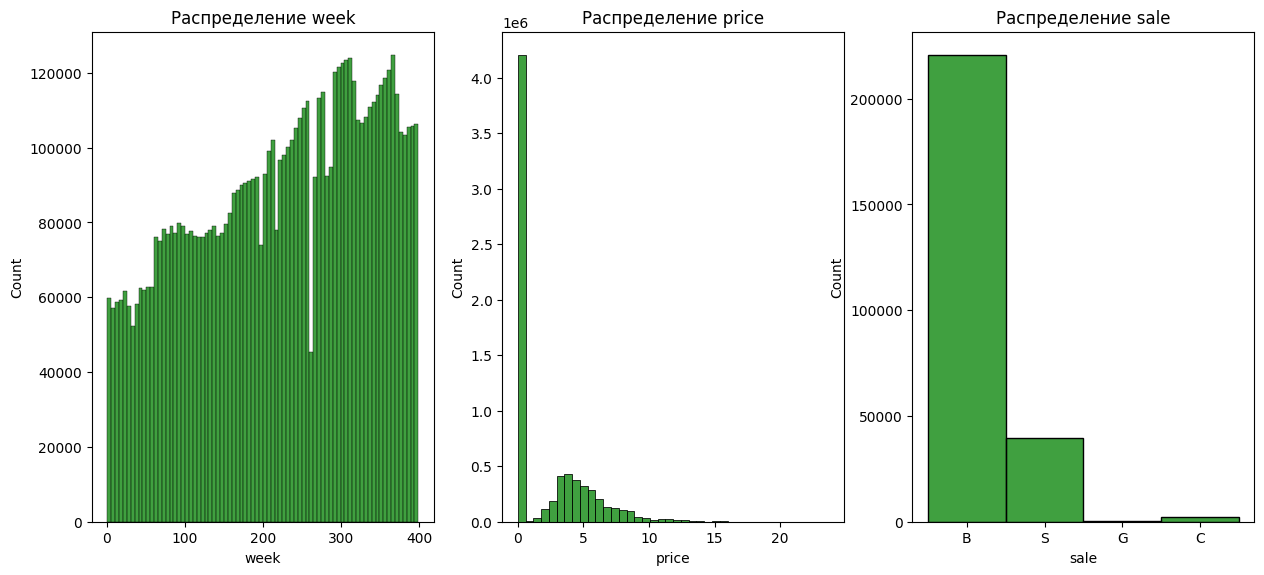

In [17]:
plt.figure(figsize=(15, 14))
for iter, col in enumerate(['week','price', 'sale'], 1):
    plt.subplot(2, 3, iter)
    
    if col == 'week': bins = 80
    else: bins = 40
    
    sns.histplot(data=ana_sales_df, x=col, bins=bins, color = 'green')
    plt.title(f'Распределение {col}')
plt.show()

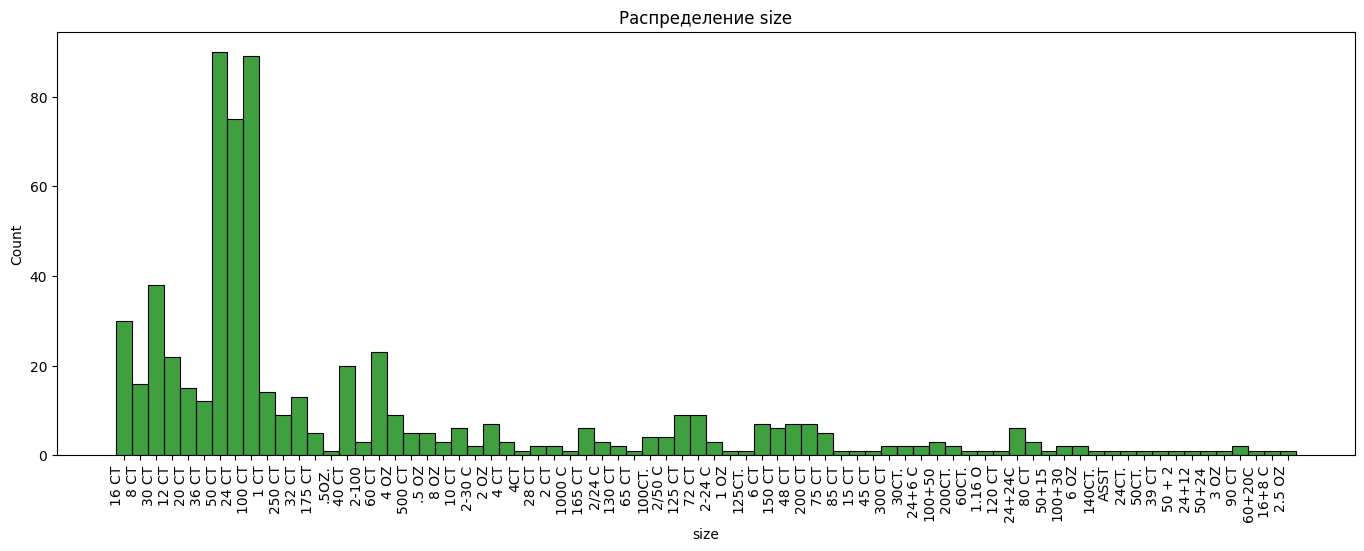

In [18]:
plt.figure(figsize=(40, 10))

for iter, col in enumerate(ana_features_upc[1:], 1):
    plt.subplot(2, 3, iter)
    sns.histplot(data=ana_upc_df, x=col, bins=100, color = 'green')
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### `ana_sales_df['price']`
Уберем неадеватные значения цены (ниже 0.5$). Для этого посмотрим распределение цен

count    7.241655e+06
mean     2.176140e+00
std      2.981170e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.190000e+00
max      2.369000e+01
Name: price, dtype: float64

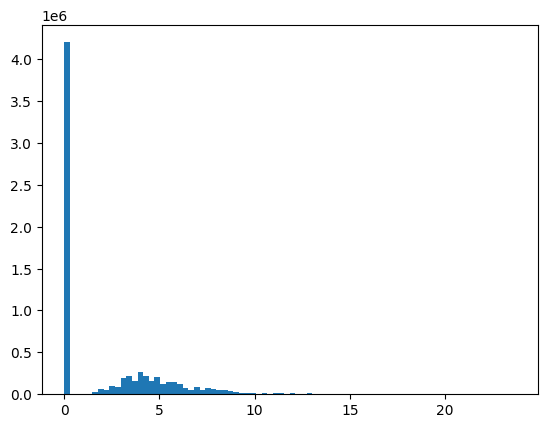

In [19]:
plt.hist(ana_sales_df['price'], bins=80)   
ana_sales_df['price'].describe()

По данному выводу видно, что медиана равна 0. Тут явно есть проблема с нулевыми значениями поля `price`.

В данных имеется явный шум, скорее всего связанный с неправильно забитыми данными. 
Шум составляет 57% от общего числа объектов, но засчёт того, что остается ~ 4e+6 корректных объектов в выборке, мы можем устранить из выборки объекты с 0 в поле `price`, улучшив качество модели.

В случае, если указана цена с учетом скидки, то можно было бы оправдать такое количество полей `price` со значением 0, но если посмотреть на график распределения скидок, то мы видим, что товара со значением `sales` = 'B' or 'C' - не более 2.5e+5.  


KeyboardInterrupt: 

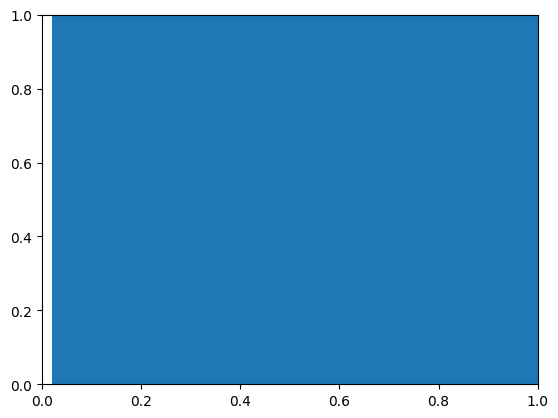

In [20]:
blowout_price_rows = (ana_sales_df['price'] == 0) # in dollars 
ana_sales_df.drop(ana_sales_df[blowout_price_rows].index, inplace=True)

plt.hist(ana_sales_df['price'], bins=80)
plt.title('Prices of analgesics sales')
plt.xlabel('Price')
plt.ylabel('Numbers')

ana_sales_df['price'].describe()   

---